In [9]:
# use in jupyter notebook
%matplotlib inline

In [10]:
# import package
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ward, fcluster, leaders
from scipy.cluster import hierarchy
from scipy.sparse import csr_matrix
import networkx as nx
import seaborn as sns
import math

sc = StandardScaler()

sns.set_style("ticks")

sns.despine()

<Figure size 432x288 with 0 Axes>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

! mkdir res

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# import data

# file dir
# fullFile = "./data/full_music_data.csv"
# influenceFile = "./data/influence_data.csv"
influenceFile = "/content/drive/MyDrive/data/influence_data.csv"
# fullFileRes = "./data/full_data.csv"
fullFileRes = "/content/drive/MyDrive/data/full_data.csv"
# artistFile = "./data/data_by_artist.csv"
artistFile = "/content/drive/MyDrive/data/data_by_artist.csv"

# sixGenresFile = './data/6data.csv'
sixGenresFile = "/content/drive/MyDrive/data/6data.csv"

# read data
fullData = pd.read_csv(fullFileRes, dtype = str)
influenceData = pd.read_csv(influenceFile, dtype = str)
artistData = pd.read_csv(artistFile, dtype = str)
sixData = pd.read_csv(sixGenresFile, dtype=str)


In [13]:
# const
genre = {'Pop/Rock':0, 'R&B;':1, 'Country':2, 'Jazz':3, 'Vocal':4, 'Latin':5, 'Classical':6, 'Folk':7, 'International':8, 'Blues':9, 'Reggae':10, 'Electronic':11, 'Easy Listening':12, 'Stage & Screen':13, 'Religious': 14, 'Comedy/Spoken':15, 'New Age':16, 'Avant-Garde':17, "Children's": 18, 'Unknown': 19}

In [14]:
# 重复数据
# fullData[fullData['song_title (censored)'] == 'Better Together']
# fullData[fullData['song_title (censored)'] == 'Fake']

In [15]:
def cleanData(data):
    # 去重 去unmaned 去nan
    cleaned_data = data.drop_duplicates(keep='first',inplace=False).loc[:, ~data.columns.str.contains("^Unnamed")].dropna(axis=1,how='all').dropna(axis=0, how='any')
    return cleaned_data

In [16]:
# clean data
fullData = cleanData(fullData)
artistData = cleanData(artistData)
sixData = cleanData(sixData)

fullData_6 = fullData[(fullData['genre'] == 'Pop/Rock') | (fullData['genre'] == 'R&B;') | (fullData['genre'] == 'Country') | (fullData['genre'] == 'Jazz') | (fullData['genre'] == 'Vocal') | (fullData['genre'] == 'Latin')]


In [19]:
# change to numpy

fullData_np = pd.DataFrame(fullData, columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit']).to_numpy().astype(float)
artistData_np = artistData.drop(columns=['artist_name', 'artist_id', 'count', 'popularity', 'genre']).to_numpy().astype(float)
sixData_np = sixData.drop(columns=['leibie']).to_numpy().astype(float)

artistData.to_csv('./res/art_clear.csv')
pd.DataFrame(sc.fit_transform(artistData_np)).to_csv('./res/art_fit.csv')

In [20]:
# 拼接流派数据

# genre_res = pd.DataFrame(index=artistData.index, columns=['genre'])

# for row_index, row in artistData['artist_id'].items():
#     _tem = (influenceData.loc[(influenceData['influencer_id'] == row) | (influenceData['follower_id'] == row)]['influencer_main_genre'])
#     if _tem.shape[0] != 0:
#         genre_res['genre'][row_index] = _tem.iloc[0]
        
# artistData_concated = pd.concat([artistData,genre_res],axis=1)
# artistData_concated.to_csv('./res/artistData_concated.csv')

# genre_res = pd.DataFrame(index=artistData.index, columns=['genre'])

# fullData['artists_id'].astype(str)

# for row_index, row in fullData['artists_id'].items():
#     _tem = (influenceData.loc[(influenceData['influencer_id'] == row) | (influenceData['follower_id'] == row)]['influencer_main_genre'])
#     if _tem.shape[0] != 0:
#         genre_res['genre'][row_index] = _tem.iloc[0]
        
# fullData_concated = pd.concat([fullData,genre_res],axis=1)
# fullData_concated.to_csv('./res/fullData_concated.csv')


In [22]:
# PCA 主成分分析
def pca(XMat, k):
    m, n = np.shape(XMat)                          # 返回维度 m*n。本处 m*n = 150*4              # axis=0 返回列的平均值。
    data_adjust = sc.fit_transform(XMat)            # 本例对数据进行的是中心化处理（也可以换成标准化）
    covX = np.cov(data_adjust.T)                   # 得到协方差矩阵
                                                   # 为什么要转置呢？转置后生成4*4的的协方差矩阵式，否则150*150。
    eigenValue, eigenVec = np.linalg.eig(covX)     # linear algebra 线性代数, eigen 特征。 |R - lambdaIp| = 0可求得p个特征根，以确定主成分，即 ∑lambda_n_of_all/∑lambda_all >=0.85。
    
    eigValIndice=np.argsort(eigenValue)
    n_eigValIndice=eigValIndice[-1:-(k+1):-1]      #最大的n個特徵值的下標
    n_eigVect=eigenVec[:,n_eigValIndice]
    n_eigVal=eigenValue[n_eigValIndice]
    finalData = np.dot(data_adjust, n_eigVect)
    
    return finalData, n_eigVect, n_eigVal

In [23]:
# 调用主成分分析

# artistData_np_1 = pd.read_csv('./data.')

art_ver, art_vec, art_val  = pca(artistData_np, 7)

np.savetxt("./res/eigVect.txt",art_vec)
pd.DataFrame(art_ver).to_csv("./res/ver.csv")

# a = art_val

# a = a/sum(a)

# for i in range(1, len(a)):
#     a[i] = a[i] + a[i-1]

# x = np.linspace(1, 12, 12)

# plt.figure(figsize=(9, 6))

# markerline, stemlines, baseline = plt.stem(x, a, '-')

# plt.setp(baseline, color='r', linewidth=2)

# plt.xticks(x)

# plt.xlabel('Principal component')

# plt.ylabel('Influence ratio')

# plt.savefig('./img/PCA_line.jpg', dpi=600)

# plt.show()

In [24]:
# 主成分分析作图函数

def pca_draw2D(data, n_eigVect, columns=[ 'artist_name','artist_id', 'count', 'popularity', 'genre']):
    for i in range(6):
        _data = sc.fit_transform(np.dot(sc.fit_transform(data[data['genre'] == list (genre.keys()) [list (genre.values()).index (i)]].drop(columns=columns).to_numpy().astype(float)), n_eigVect))
        plt.scatter(_data[:,0], _data[:,1], edgecolor='none',
                alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))

    # plt.xlim((-3, 3))
    # plt.ylim((-3, 3))

def pca_draw3D(data, n_eigVect, columns=[ 'artist_name','artist_id', 'count', 'popularity', 'genre']):
    
    ax = plt.subplot(111, projection='3d')
    for i in range(6):
        _data = sc.fit_transform(np.dot(sc.fit_transform(data[data['genre'] == list (genre.keys()) [list (genre.values()).index(i)]].drop(columns=columns).to_numpy().astype(float)), n_eigVect))
        ax.scatter(_data[:,0], _data[:,1], _data[:,2])
        
    ax.set_zlim(-2, 2)
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

In [25]:
# 主成分分析作图
# %matplotlib inline
# pca_draw2D(artistData, eigVect)

# %matplotlib notebook
# pca_draw3D(artistData, eigVect)

FileNotFoundError: ignored

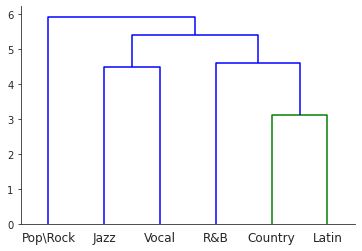

In [26]:
# 聚类算法
%matplotlib inline

label_name = np.array(['Country','Jazz','Latin','Pop\Rock','R&B','Vocal'])

cluData = sc.fit_transform(sixData_np)

Z = hierarchy.linkage(cluData, method ='average',metric='euclidean')
hierarchy.dendrogram(Z, labels=label_name)
sns.despine()

plt.savefig('./img/6Data.jpg', dpi=600)
plt.show()

cluData.shape

In [ ]:
%matplotlib inline

label_name = np.array(['Country','Jazz','Latin','Pop\Rock','R&B','Vocal'])
cluData = (np.dot(sc.fit_transform(sixData_np), art_vec))

# ver = sc.fit_transform(artistData_np)

# ver = (np.dot(sc.fit_transform(artistData_np), n_eigVect))

Z = hierarchy.linkage(cluData, method ='average',metric='euclidean')
hierarchy.dendrogram(Z, labels=label_name)

sns.despine()

plt.savefig('./img/6Data_pac.jpg', dpi=600)
plt.show()

cluData.shape

In [ ]:
# 距离矩阵函数
def disArr(ver):
    
    distA=pdist(ver,metric='euclidean')
    # # 将distA数组变成一个矩阵
    distB = squareform(distA)
    
        # 计算组内和组件平均距离
    dis_arr = np.zeros((6, 6))

    for i in range(6):
        for j in range(i+1, 6):
            _row = np.flatnonzero(artistData['genre'] == list (genre.keys()) [list (genre.values()).index (i)])
            _col = np.flatnonzero(artistData['genre'] == list (genre.keys()) [list (genre.values()).index (j)])
            _data = distB[_row, :]
            _data = _data[:, _col]
            dis_sum = np.sum(_data)/(_row.shape[0] * _col.shape[0])
            dis_arr[i, j] = dis_sum

    dis_same = np.zeros((6, 6))
    for i in range(6):
        _row = np.flatnonzero(artistData['genre'] == list (genre.keys()) [list (genre.values()).index (i)])
        _data = distB[_row,:]
        _data = _data[:, _row]
        dis_sum = np.sum(_data)/(_row.shape[0] * _row.shape[0])
        dis_same[i, i] = dis_sum

    dis_arr = pd.DataFrame(dis_same) + pd.DataFrame(dis_arr)
    
    return dis_arr, distB

In [ ]:
# 距离矩阵计算
ver_dis_arr, ver_disB =  disArr(ver)

pd.DataFrame.to_csv(ver_dis_arr, './res/dis_arr_7_dim.csv')

_data_dis = sc.fit_transform(artistData_np)

data_dis_arr, data_disB = disArr(_data_dis)

pd.DataFrame.to_csv(data_dis_arr, './res/dis_arr.csv')


In [ ]:
# 60类聚类
_60_art_data = np.genfromtxt("./data/60_ar.csv", dtype="int")
_70_art_data = np.genfromtxt("./data/70_ar.csv", dtype="int")
_80_art_data = np.genfromtxt("./data/80_ar.csv", dtype="int")

artistData['artist_id'] = artistData['artist_id'].astype('int')

_60_art =  artistData[artistData['artist_id'].isin(_60_art_data)]
_70_art =  artistData[artistData['artist_id'].isin(_70_art_data)]
_80_art =  artistData[artistData['artist_id'].isin(_80_art_data)]

_60_art_np = _60_art.drop(columns=['artist_name', 'artist_id', 'count', 'popularity', 'genre']).to_numpy().astype(float)
_70_art_np = _70_art.drop(columns=['artist_name', 'artist_id', 'count', 'popularity', 'genre']).to_numpy().astype(float)
_80_art_np = _80_art.drop(columns=['artist_name', 'artist_id', 'count', 'popularity', 'genre']).to_numpy().astype(float)

_60_art_np = np.dot(sc.fit_transform(_60_art_np), art_vec)
_70_art_np = np.dot(sc.fit_transform(_70_art_np), art_vec)
_80_art_np = np.dot(sc.fit_transform(_80_art_np), art_vec)

# _60_art_np = sc.fit_transform(_60_art_np)
# _70_art_np = sc.fit_transform(_60_art_np)


plt.figure(figsize=(12, 6))

Z = hierarchy.linkage(_60_art_np, method ='average',metric='euclidean')

hierarchy.dendrogram(Z, leaf_rotation=90., leaf_font_size=10., show_contracted=True, truncate_mode='lastp')

sns.despine()
plt.savefig('./img/60_clu.jpg', dpi = 600)

plt.show()

_60_art.to_csv('./res/_60_art.csv')


In [ ]:
plt.figure(figsize=(12, 6))

Z = hierarchy.linkage(_70_art_np, method ='average',metric='euclidean')

hierarchy.dendrogram(Z, leaf_rotation=90., leaf_font_size=10., show_contracted=True, truncate_mode='lastp')

sns.despine()
plt.savefig('./img/70_clu.jpg', dpi = 600)

plt.show()

_70_art.to_csv('./res/_70_art.csv')

In [ ]:
plt.figure(figsize=(12, 6))

Z = hierarchy.linkage(_80_art_np, method ='average',metric='euclidean')

hierarchy.dendrogram(Z, leaf_rotation=90., leaf_font_size=10., show_contracted=True, truncate_mode='lastp')

sns.despine()
plt.savefig('./img/80_clu.jpg', dpi = 600)

plt.show()

_80_art.to_csv('./res/_80_art.csv')

In [ ]:
T = fcluster(Z, 3, criterion='distance')

T.shape

In [ ]:
# 聚类树图



# plt.figure(figsize=(50, 50))
g = sns.clustermap(_70_art_np)
plt.show()

In [ ]:
pd.DataFrame(Z)

In [ ]:
# 从此往下为 12类特征展示
he = fullData

fullData_6

In [ ]:
fullData_6['danceability'] = fullData_6['danceability'].astype('float')

plt.figure(figsize=(8, 6))


sns.kdeplot(
   data=fullData_6, x='danceability', hue='genre',
#    fill=True, common_norm=False, palette="bright",
#    alpha=.2, linewidth=0,
)
sns.despine()
plt.savefig('./img/danceability.jpg', dpi=600)

plt.figure(figsize=(8, 6))

fullData_6['energy'] = fullData_6['energy'].astype('float')


sns.kdeplot(

   data=fullData_6, x='energy', hue='genre',
#     fill=True, common_norm=False, palette="crest",
#    alpha=.3, linewidth=0,
)
sns.despine()
plt.savefig('./img/energy.jpg', dpi=600)

fullData_6['valence'] = fullData_6['valence'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='valence', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.3, linewidth=0,
)
sns.despine()
plt.savefig('./img/valence.jpg', dpi=600)

fullData_6['tempo'] = fullData_6['tempo'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='tempo', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.3, linewidth=0,
)
sns.despine()
plt.savefig('./img/tempo.jpg', dpi=600)


fullData_6['loudness'] = fullData_6['loudness'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='loudness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/loudness.jpg', dpi=600)

fullData_6['acousticness'] = fullData_6['acousticness'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='acousticness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/acousticness.jpg', dpi=600)

fullData_6['instrumentalness'] = fullData_6['instrumentalness'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='instrumentalness', hue='genre',
#    fill=True, common_norm=False, palette="bright",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/instrumentalness.jpg', dpi=600)

fullData_6['liveness'] = fullData_6['liveness'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='liveness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/liveness.jpg', dpi=600)

fullData_6['speechiness'] = fullData_6['speechiness'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='speechiness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/speechiness.jpg', dpi=600)

fullData_6['duration_ms'] = fullData_6['duration_ms'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='duration_ms', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/duration_ms.jpg', dpi=600)

fullData_6['popularity'] = fullData_6['popularity'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='popularity', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/popularity.jpg', dpi=600)




In [ ]:
# 计算网络图邻接矩阵
graph = np.zeros((influenceData.shape[0], 2))

minYear = int(min(min(influenceData['influencer_active_start']), min(influenceData['follower_active_start'])))

minYear

maxYear = int(max(max(influenceData['influencer_active_start']), max(influenceData['follower_active_start'])))

for row_index, row  in influenceData.iterrows():
    # print(row_index, row['influencer_main_genre'])
    
    graph[row_index][0] = genre[row['influencer_main_genre']] + int((int(row['influencer_active_start']) - minYear)/10)* 20
    graph[row_index][1] = genre[row['follower_main_genre']] + int((int(row['follower_active_start']) - minYear)/10) * 20


In [ ]:
# 通过邻接矩阵作图
%matplotlib inline
graph = graph.astype(int)

G = nx.Graph()

G.clear()

row = np.array(graph[:, 0])
col = np.array(graph[:, 1])

data = np.ones((1, graph.shape[0])).reshape(-1)

n = max(max(row), max(col)) + 1

pos = {}

for i in range((maxYear - minYear + 10)*2):
    pos[i] = (i // 20, i % 20)

A = csr_matrix((data, (row, col)), shape=(n, n)).toarray()

A = np.where(A < 0, 0, A).astype('int')

G = nx.from_numpy_matrix(A, create_using=nx.DiGraph()) 

_be_d = dict(G.degree)

G.remove_nodes_from(list(nx.isolates(G)))

# G = G.to_directed()

color_list = [float(v['weight']*0.5) for (r,c,v) in G.edges(data=True)]

color_list = [int(((i/max(color_list))*8 + 2)) for i in color_list]

d = dict(G.degree)

plt.figure(figsize=(15, 6))


plt.axis("off")
# nx.draw(G, pos, node_color="#A0CBE2", edge_color="#aaaaaa")
nx.draw(G,
        pos,
        width=color_list,
        node_color="#60acfc",
        edge_color = 'b',
        alpha = 0.1
       )
nx.draw_networkx_nodes(G,pos, node_color="#60acfc",node_size=[v * 3 for v in d.values()], alpha=0.8)

plt.savefig('./img/all_network.jpg', dpi = 600)

plt.show() 


In [ ]:
# 通过邻接矩阵作图
%matplotlib inline
graph = graph.astype(int)

G = nx.Graph()

G.clear()

row = np.array(graph[:, 0])
col = np.array(graph[:, 1])

data = np.ones((1, graph.shape[0])).reshape(-1)

n = max(max(row), max(col)) + 1

pos = {}

for i in range((maxYear - minYear + 10)*2):
    pos[i] = (i // 20, i % 20)

A = csr_matrix((data, (row, col)), shape=(n, n)).toarray()

A = np.where(A < 50, 0, A).astype('int')

G = nx.from_numpy_matrix(A, create_using=nx.DiGraph()) 

_be_d = dict(G.degree)

G.remove_nodes_from(list(nx.isolates(G)))

# G = G.to_directed()

color_list = [float(v['weight']*0.5) for (r,c,v) in G.edges(data=True)]

color_list = [int(((i/max(color_list))*8 + 2)) for i in color_list]

# d = dict(G.degree)

# plt.figure(figsize=(15, 6))


plt.axis("off")
# nx.draw(G, pos, node_color="#A0CBE2", edge_color="#aaaaaa")
nx.draw(G,
        pos,
        width=color_list,
        node_color="#60acfc",
        edge_color = 'b',
        alpha = 0.3
       )
nx.draw_networkx_nodes(G,pos, node_color="#60acfc",
#                        node_size=[v * 3 for v in d.values()],
                       alpha=0.9
                      )

plt.savefig('./img/all_network_50.jpg', dpi = 600)

plt.show() 


In [ ]:
# subnet
# sublist = []

# for i in range(6):
#     for j in range(9):
#         sublist.append(j*10+i)
        
# sub_A = np.zeros((54, 54))
        
# for i in range(len(sublist)):
#     for j in range(len(sublist)):
#         sub_A[i, j] = A[sublist[i], sublist[j]]
        
# pos_sub = {}

# for i in range(54):
#     pos_sub[i] = (i // 6, i % 6)

sublist = [65, 85, 105, 125]

# sublist = [60, 80, 100, 120]
sub_A = np.zeros((4, 4))

# pos_sub = [(0,0), (1,0), (2,0),(3,0)]

for i in range(len(sublist)):
    for j in range(len(sublist)):
        sub_A[i, j] = A[sublist[i], sublist[j]]

G_sub = nx.from_numpy_matrix(sub_A, create_using=nx.DiGraph()) 

G_sub.remove_nodes_from(list(nx.isolates(G_sub)))

# G_sub = G_sub.to_directed()

color_list = [float(v['weight']*0.5) for (r,c,v) in G_sub.edges(data=True)]

color_list = [int(((i/max(color_list))*2 + 2)) for i in color_list]

d_sub = {k:v for k,v in d.items() if k in sublist}

plt.figure(figsize=(15, 6))

label = {0: '50s', 1:'60s', 2:'70s', 3:'80s'}

# label = {0: '60s', 1:'70s', 2:'80s', 3:'90s'}

plt.axis("off")
# nx.draw(G, pos, node_color="#A0CBE2", edge_color="#aaaaaa")
nx.draw(G_sub,
#         pos = pos,
        width=4,
        node_color="#60acfc",
        edge_color =color_list,
        edge_cmap=plt.cm.Blues,
#         alpha = 0.5,
        node_size=[v * 40 for v in d_sub.values()],
#         with_labels = False,
        labels = label,
        font_size = 25,
       )
# pos = nx.spring_layout(G_sub)
# for p in pos:  # raise text positions
#     pos[p][1] += 0
# nx.draw_networkx_labels(G_sub, pos,
# #         alpha = 0.5,
# #         with_labels = False,
#         labels = label,
#         font_size = 20,)
# nx.draw_networkx_nodes(G_sub,pos = pos_sub, node_color="#60acfc",node_size=[v * 3 for v in d_sub.values()], alpha=0.8)

plt.savefig('./img/all_network_local_jazz.jpg', dpi = 600)

plt.show() 
# G = nx.Graph()

# G.clear()

# row = np.array(graph[:, 0])
# col = np.array(graph[:, 1])

# data = np.ones((1, graph.shape[0])).reshape(-1)

# n = max(max(row), max(col)) + 1

# pos = {}

# for i in range((maxYear - minYear + 10)*2):
#     pos[i] = (i // 20, i % 20)

# A = csr_matrix((data, (row, col)), shape=(n, n)).toarray()

# A = np.where(A < 0, 0, A).astype('int')

# G = nx.from_numpy_matrix(A) 

# G.remove_nodes_from(list(nx.isolates(G)))

# G = G.to_directed()

# color_list = [float(v['weight']*0.5) for (r,c,v) in G.edges(data=True)]

# color_list = [int(((i/max(color_list))*8 + 2)) for i in color_list]

# d = dict(G.degree)

# plt.figure(figsize=(15, 6))


# plt.axis("off")
# # nx.draw(G, pos, node_color="#A0CBE2", edge_color="#aaaaaa")
# nx.draw(G,
#         pos,
#         width=color_list,
#         node_color="#60acfc",
#         edge_color = 'b',
#         alpha = 0.1
#        )
# nx.draw_networkx_nodes(G,pos, node_color="#60acfc",node_size=[v * 3 for v in d.values()], alpha=0.8)

# # plt.savefig('./img/all_network.jpg', dpi = 600)

# plt.show() 

In [ ]:
# pos = nx.spring_layout(G_sub)

In [ ]:
# 将fullData 通过不同年份和不同流派分割
minYear = int(min(fullData['year']))

minYear = round(minYear/10)*10

maxYear = int(max(fullData['year']))

maxYear = math.ceil(maxYear/10)*10

fullData['year'] = fullData['year'].astype('int')

# 正常数据
for i in range(6):
    
    _table = pd.DataFrame(columns=fullData.iloc[:, 2:17].columns).drop(columns=['explicit'])
    
    for j in range(int((maxYear - minYear)/10)):
        _data = fullData[(fullData['genre'] == list (genre.keys()) [list (genre.values()).index (i)]) & (fullData['year'] >= minYear + j * 10) & (fullData['year'] < minYear + (j+1) * 10)].iloc[:, 2:17].drop(columns=['explicit'])
        a = _data.astype('float').mean()
        a['year'] = minYear + j * 10
        _table = _table.append(a, ignore_index=True)
    
    pd.DataFrame(sc.fit_transform(_table)).to_csv("./res/"+ list(genre.keys()) [list (genre.values()).index (i)][0:3]+".csv")

_table = pd.DataFrame(columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit'])
    
for j in range(int((maxYear - minYear))):
    _data = fullData[(fullData['genre'] == list (genre.keys()) [list (genre.values()).index (0)]) & (fullData['year'] == minYear + j) ].iloc[:, 2:17].drop(columns=['explicit'])
    a = _data.astype('float').mean()
    a = a 
    a['year'] = minYear + j
    _table = _table.append(a, ignore_index=True)

pd.DataFrame(sc.fit_transform(_table)).to_csv("./res/"+ list(genre.keys()) [list (genre.values()).index (0)][0:3]+"_1.csv")

# 降维数据
full_ver, full_n_eigVect, full_eigInd = pca(fullData_np, 7)

N_ei = pd.DataFrame(full_n_eigVect)

all_table_7 = pd.DataFrame(columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit'])

for i in range(6):
    
    _table_7 = pd.DataFrame(columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit'])
    
    for j in range(int((maxYear - minYear)/10)):
        _data = fullData[(fullData['genre'] == list (genre.keys()) [list (genre.values()).index (i)]) & (fullData['year'] >= minYear + j * 10) & (fullData['year'] < minYear + (j+1) * 10)].iloc[:, 2:15].drop(columns=['explicit'])
        a = _data.astype('float').mean()
        _table_7 = _table_7.append(a, ignore_index=True)
        
    pd.DataFrame(sc.fit_transform(np.dot(sc.fit_transform(_table_7.to_numpy()), full_n_eigVect))).to_csv("./res/"+ list(genre.keys()) [list (genre.values()).index (i)][0:3]+"_7_dim.csv")

    _table_7['genre'] = list (genre.keys()) [list (genre.values()).index (i)]
    all_table_7 = all_table_7.append(_table_7, ignore_index=True)
    
_table_7 = pd.DataFrame(columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit'])
    
for j in range(int((maxYear - minYear))):
    _data = fullData[(fullData['genre'] == list (genre.keys()) [list (genre.values()).index (2)]) & (fullData['year'] == minYear + j) ].iloc[:, 2:15].drop(columns=['explicit'])
    a = _data.astype('float').mean()
    _table_7 = _table_7.append(a, ignore_index=True)
pd.DataFrame(sc.fit_transform(np.dot(sc.fit_transform(_table_7.to_numpy()), full_n_eigVect))).to_csv("./res/"+ list(genre.keys()) [list (genre.values()).index (2)][0:3]+"_1_7_dim.csv")



In [ ]:
# def show_label(id):
#     return all_table_7['genre'][id]

all_table_7



In [ ]:
# all_table 聚类

all_table_7 = all_table_7.dropna(how = 'any')

all_table_7_np = all_table_7.drop(columns=['genre']).to_numpy().astype('float')

all_table_7_np = sc.fit_transform(all_table_7_np)

# Convert the palette to vectors that will be drawn on the side of the matrix
# networks = df.columns.get_level_values("network")
# network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# g = sns.clustermap(all_table_7_np, cmap="mako",
#                    col_cluster = False,
#                    figsize=(20, 20),
#                    standard_scale=1
# #                    row_colors=network_colors, col_colors=network_colors,
# #                    dendrogram_ratio=(.1, .2),
# #                    cbar_pos=(.02, .32, .03, .2),
# #                    linewidths=.75, figsize=(12, 13)
#                   )

plt.figure(figsize=(15, 6))

Z = hierarchy.linkage(all_table_7_np, method ='ward',metric='euclidean')

hierarchy.dendrogram(Z, show_leaf_counts=True, leaf_font_size=15., show_contracted=True)

plt.savefig('./img/all_table.jpg', dpi=600)

plt.show()

# _60_art.to_csv('./res/_60_art.csv')

In [ ]:
all_table_7

In [ ]:
# only year 7dim
_table_7 = pd.DataFrame(columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit'])

# for j in range(int((maxYear - minYear))):
#     _data = fullData[(fullData['year'] == minYear + j) ].iloc[:, 2:15].drop(columns=['explicit'])
#     a = _data.astype('float').mean()
#     _table_7 = _table_7.append(a, ignore_index=True)
# pd.DataFrame(sc.fit_transform(np.dot(sc.fit_transform(_table_7.to_numpy()), n_eigVect))).to_csv("./res/only_year_1_7_dim.csv")

for j in range(int((maxYear - minYear))):
    _data = fullData[(fullData['year'] == minYear + j) ].iloc[:, 2:17].drop(columns=['explicit'])
    a = _data.astype('float').mean()
    _table_7 = _table_7.append(a, ignore_index=True)
pd.DataFrame(sc.fit_transform(_table_7)).to_csv("./res/only_year_1.csv")

minYear
maxYear

In [ ]:


rock_song = pd.read_csv('./data/rock_song.csv')

# rock_ver , rock_vec, rock_val = pca(rock_song.to_numpy(), 4)

data_adjust = sc.fit_transform(rock_song)            # 本例对数据进行的是中心化处理（也可以换成标准化）
covX = np.cov(data_adjust.T)               # 得到协方差矩阵

ex = [[1,0.010185,0.271348],[0.010185,1,0.319343],[0.271348,0.319343,1]]

np.linalg.eig(ex)


In [ ]:
eigenValue, eigenVec = np.linalg.eig(ex)

eigValIndice=np.argsort(eigenValue)
n_eigValIndice=eigValIndice[-1:-(4+1):-1]      #最大的n個特徵值的下標
n_eigVect=eigenVec[:,n_eigValIndice]
n_eigVal=eigenValue[n_eigValIndice]
n_eigValIndice

n_eigVal

n_eigVect

In [ ]:
eigVal

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

In [ ]:
df

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.dtypes

In [ ]:
sns.set_theme(style="whitegrid")

a = np.loadtxt('./data/相关系数.txt')
a = pd.DataFrame(a)
a.index = artistData.drop(columns=['artist_name', 'artist_id', 'count', 'popularity', 'genre']).columns
a.columns = a.index

plt.figure(figsize=(9,9))

g = sns.heatmap(data = a, cmap="vlag", square=True, annot=True)

plt.tight_layout()

plt.savefig('./img/相关系数.jpg', dpi = 600)